# MNIST
---
Trains simple MNIST model

By: William Tong (wlt2115)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from deep_learning.model import mnist_model

%config IPCompleter.greedy=True

## Load + preprocess data

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

undersamp_factor = 2
train_images = train_images[:, ::2, ::2]
test_images = test_images[:, ::2, ::2]

model = mnist_model()

Instructions for updating:
Colocations handled automatically by placer.


(14, 14)


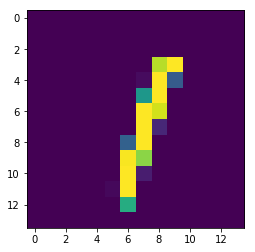

In [12]:
im = test_images[5]
plt.imshow(im)
print(im.shape)

## Investigating Variance

In [4]:
# TODO: consolidate in another script

classes = {i:[] for i in range(10)}
for i in range(len(train_labels)):
    classes[train_labels[i]].append(train_images[i].flatten())
    
for i in classes.keys():
    classes[i] = np.array(classes[i]).T  # row->pixel, col->sample

In [5]:
def _summarize(matrix) -> float:
    return np.trace(matrix)

{0: 12.486384003243435, 1: 5.627680378844706, 2: 12.699672190806524, 3: 11.255414586473798, 4: 10.225107918279907, 5: 11.898626266786508, 6: 10.80531809387863, 7: 9.357358790585437, 8: 11.432791286799468, 9: 9.72461347906398}


<BarContainer object of 10 artists>

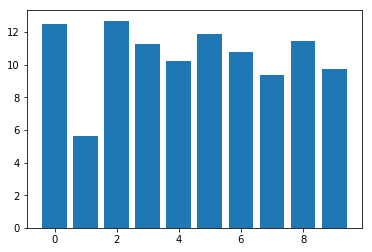

In [6]:
cov_matrices = {i: np.cov(classes[i]) for i in range(10)}
variances = {i : _summarize(cov_matrices[i]) for i in range(10)}

print(variances)
plt.bar(list(range(10)), variances.values())

## Train

In [7]:
print(train_images.shape)
model.fit(train_images, train_labels, epochs=5)

(60000, 14, 14)
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3830 - acc: 0.8936
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1810 - acc: 0.9475
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1317 - acc: 0.9619
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1054 - acc: 0.9689
Epoch 5/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0875 - acc: 0.9736


## Evaluate

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.0963 - acc: 0.9706
Test accuracy:  0.9706


## Save model

In [9]:
SAVE_PATH = r'/home/grandpaa/workspace/deep_learning/trained/mnist_model_undersamp.h5py'
tf.keras.models.save_model(model, SAVE_PATH)